In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
# Part 1
# Understanding the Data
df = pd.read_csv("Dataset.csv")
print(df.head(10))
print(df.info())
print(df.describe())

    CBSA  Core Based Statistical Area Pollutant       Trend Statistic  \
0  10420                    Akron, OH        O3               4th Max   
1  10420                          NaN     PM2.5  Weighted Annual Mean   
2  10420                          NaN     PM2.5       98th Percentile   
3  10420                          NaN       SO2       99th Percentile   
4  10500                   Albany, GA     PM2.5  Weighted Annual Mean   
5  10500                          NaN     PM2.5       98th Percentile   
6  10580  Albany-Schenectady-Troy, NY        O3               4th Max   
7  10580                          NaN     PM2.5  Weighted Annual Mean   
8  10580                          NaN     PM2.5       98th Percentile   
9  10740              Albuquerque, NM        CO               2nd Max   

   Number of Trend Sites     1990     1991     1992     1993     1994  ...  \
0                      2    0.090    0.101    0.087    0.093    0.086  ...   
1                      3      NaN      N

In [3]:
# part 2 
# Identify and Remove Zero-Variance Predictors

numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
variance_cols = numeric_df.var()
#print(variance_cols)
zero_variance_cols=[]
for variance in variance_cols:
    if variance==0:  # Check if any zero-variance columns were found.
        df = df.drop(columns=variance)
        zero_variance_cols.append(variance)
if len(zero_variance_cols)>0:    
     print(f"Removed zero-variance columns: {zero_variance_cols}")
else:
     print("No zero-variance columns found.")

    


No zero-variance columns found.


In [4]:
# part 3
# Evaluate Columns with Very Few Unique Values
threshold=15
low_unique_cols = {} 
for col in df.columns: 
        unique_count = df[col].nunique() 
        if unique_count <= threshold:  
            low_unique_cols[col] = {  
                "unique_count": unique_count, 
                "type": df[col].dtype
            }
for key in low_unique_cols.keys():
    print(f"{key}:{low_unique_cols[key]}")
            

Pollutant:{'unique_count': 7, 'type': dtype('O')}
Trend Statistic:{'unique_count': 7, 'type': dtype('O')}
Number of Trend Sites:{'unique_count': 12, 'type': dtype('int64')}


In [5]:
# part 4
# Handle Duplicate Data
duplicate_rows = df.duplicated()
print(duplicate_rows)
duplicate_rows.to_csv("duplicate_rows.csv")
num_true = duplicate_rows.sum()
print(num_true)

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool
0


In [6]:
# Part 5
# Decide on the Target Column

print(df.columns.tolist())
target = df.columns[-1]
print(df.columns.tolist())




['CBSA', 'Core Based Statistical Area', 'Pollutant', 'Trend Statistic', 'Number of Trend Sites', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
['CBSA', 'Core Based Statistical Area', 'Pollutant', 'Trend Statistic', 'Number of Trend Sites', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


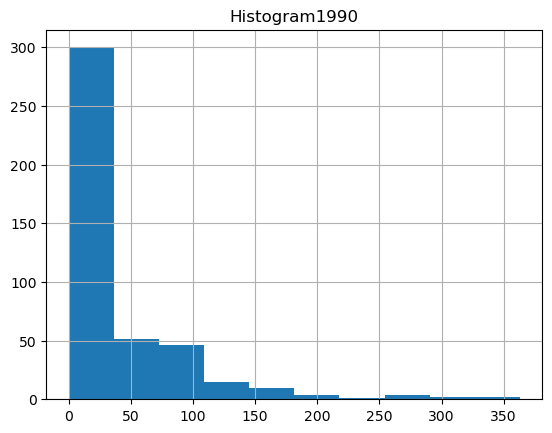

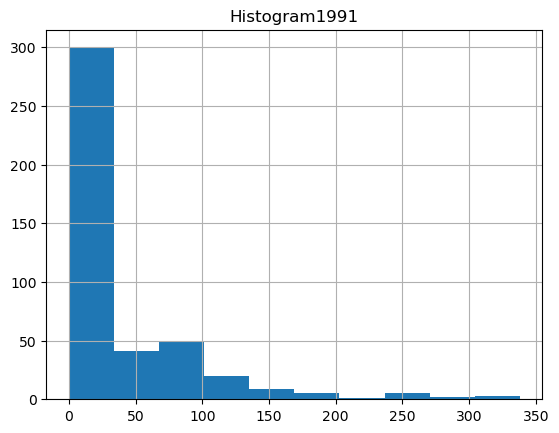

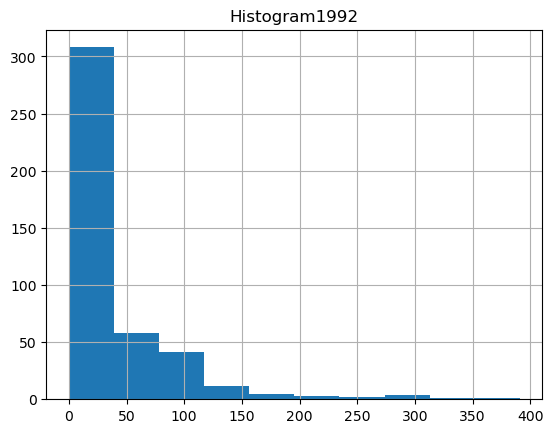

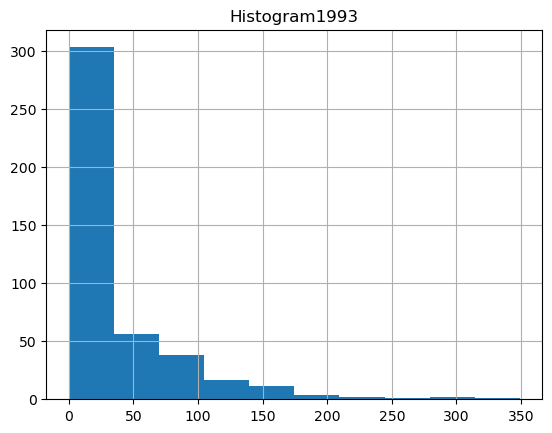

                             Missing Values  Percentage (%)
CBSA                                      0        0.000000
Core Based Statistical Area             546       66.181818
Pollutant                                 0        0.000000
Trend Statistic                           0        0.000000
Number of Trend Sites                     0        0.000000
1990                                    390       47.272727
1991                                    390       47.272727
1992                                    390       47.272727
1993                                    390       47.272727
1994                                    390       47.272727
1995                                    390       47.272727
1996                                    390       47.272727
1997                                    390       47.272727
1998                                    390       47.272727
1999                                    390       47.272727
2000                                    

C:\Users\Asus\AppData\Local\Temp\ipykernel_22656\2256070293.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


(825, 37)

In [7]:
# Part 6
# Handle Missing Values
years=["1990","1991","1992","1993"]
for col in years:
   df[col].hist()
   plt.title(f'Histogram{col}')
   plt.show()


missing_values_count = df.isnull().sum()
missing_values_percent = (missing_values_count / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percent
})
print( missing_data_summary)


threshold = 50  
columns_to_drop = missing_data_summary[missing_data_summary["Percentage (%)"] > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

for column in df.select_dtypes(include=['number']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True) 


for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True) 

df.isnull().sum()
df.shape



In [8]:
# Part 7
# Handle Categorical Data
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True) 
df.head()






,CBSA,Number of Trend Sites,1990,1991,1992,1993,1994,1995,1996,1997,...,Pollutant_PM10,Pollutant_PM2.5,Pollutant_Pb,Pollutant_SO2,Trend Statistic_4th Max,Trend Statistic_98th Percentile,Trend Statistic_99th Percentile,Trend Statistic_Annual Mean,Trend Statistic_Max 3-Month Average,Trend Statistic_Weighted Annual Mean
0,10420,2,0.09,0.101,0.087,0.093,0.086,0.092,0.091,0.087,...,False,False,False,False,True,False,False,False,False,False
1,10420,3,4.40,4.200,3.800,4.100,4.000,3.400,3.500,3.100,...,False,True,False,False,False,False,False,False,False,True
2,10420,3,4.40,4.200,3.800,4.100,4.000,3.400,3.500,3.100,...,False,True,False,False,False,True,False,False,False,False
3,10420,1,161.00,183.000,181.000,209.000,132.000,123.000,133.000,155.000,...,False,False,False,True,False,False,True,False,False,False
4,10500,1,4.40,4.200,3.800,4.100,4.000,3.400,3.500,3.100,...,False,True,False,False,False,False,False,False,False,True


               CBSA  Number of Trend Sites        1990        1991  \
count    825.000000             825.000000  825.000000  825.000000   
mean   30450.048485               1.815758   20.756695   20.384076   
std    11754.076622               1.656114   45.166461   44.647624   
min    10420.000000               1.000000    0.000000    0.009000   
25%    19740.000000               1.000000    0.148000    0.200000   
50%    30780.000000               1.000000    4.400000    4.200000   
75%    40860.000000               2.000000    6.300000    6.000000   
max    49700.000000              13.000000  363.000000  338.000000   

             1992        1993        1994        1995        1996        1997  \
count  825.000000  825.000000  825.000000  825.000000  825.000000  825.000000   
mean    19.368590   18.782131   18.510387   16.473217   15.475851   15.305965   
std     43.410292   40.376420   38.704141   33.960126   31.788115   32.065020   
min      0.013000    0.007000    0.021000    

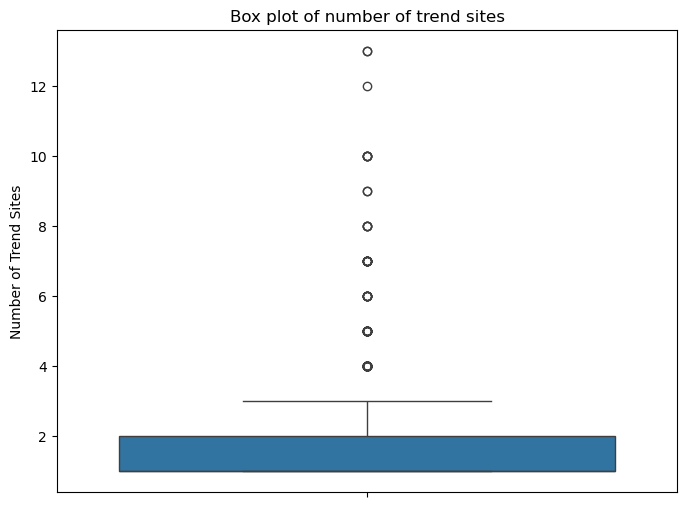

q1:1.0 q2:2.0
lower_bound:-0.5 upper_bound :3.5
CBSA: not nan_numerical data found 

Number of Trend Sites: not nan_numerical data found 

1990: not nan_numerical data found 

1991: not nan_numerical data found 

1992: not nan_numerical data found 

1993: not nan_numerical data found 

1994: not nan_numerical data found 

1995: not nan_numerical data found 

1996: not nan_numerical data found 

1997: not nan_numerical data found 

1998: not nan_numerical data found 

1999: not nan_numerical data found 

2000: not nan_numerical data found 

2001: not nan_numerical data found 

2002: not nan_numerical data found 

2003: not nan_numerical data found 

2004: not nan_numerical data found 

2005: not nan_numerical data found 

2006: not nan_numerical data found 

2007: not nan_numerical data found 

2008: not nan_numerical data found 

2009: not nan_numerical data found 

2010: not nan_numerical data found 

2011: not nan_numerical data found 

2012: not nan_numerical data found 

2013: not 

(825, 47)

In [9]:
# Part 8
# Address Inconsistent Data Entry
print(df.describe())

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Number of Trend Sites'])
plt.title('Box plot of number of trend sites')
plt.show()


q1 = df['Number of Trend Sites'].quantile(0.25)
q3 = df['Number of Trend Sites'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"q1:{q1} q2:{q3}")
print(f"lower_bound:{lower_bound} upper_bound :{upper_bound}")
  


numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    nan_values = df[col].isnull().sum()
    if nan_values > 0:
        print(f"number of non_numerical {col}: {nan_values}")
        print(df[df[col].isnull()])  
    else:
        print(f"{col}: not nan_numerical data found \n")    
df.dropna(subset=numerical_cols, inplace=True) 



categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 20)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.strip() 
df.shape    
 




In [10]:
# Part 9
# Handle Dates and Times

date_columns = df.select_dtypes(include=['datetime64']).columns
if len(date_columns)>0:
  for col in date_columns:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
else:
  print("not date_columns found")
print(df.shape)  


not date_columns found
(825, 47)


In [11]:
# Part 10
# Split the Data into Training and Testing Sets
print(df.shape)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape)

(825, 47)


((660, 46), (165, 46))

In [12]:
# Part 11
# Scaling and Normalization
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train), columns=X_train.columns)
print(X_train_scaled)



         CBSA  Number of Trend Sites      1990      1991      1992      1993  \
0    0.282077               0.000000  0.000174  0.000231  0.000164  0.000247   
1    0.860489               0.083333  0.000198  0.000246  0.000156  0.000254   
2    0.800407               0.500000  0.000113  0.000145  0.000107  0.000187   
3    0.419552               0.000000  0.308500  0.402344  0.240370  0.441458   
4    0.362525               0.000000  0.012064  0.012388  0.009668  0.013689   
..        ...                    ...       ...       ...       ...       ...   
655  0.069246               0.000000  0.137691  0.147896  0.127833  0.224062   
656  0.126273               0.000000  0.009585  0.011205  0.015551  0.014693   
657  0.321792               0.000000  0.012064  0.012388  0.009668  0.013689   
658  0.570265               0.250000  0.000185  0.000213  0.000153  0.000258   
659  0.113035               0.083333  0.012064  0.012388  0.009668  0.013689   

         1994      1995      1996      

In [13]:
# Part 12
# Data Modeling

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)



27.651161445112926


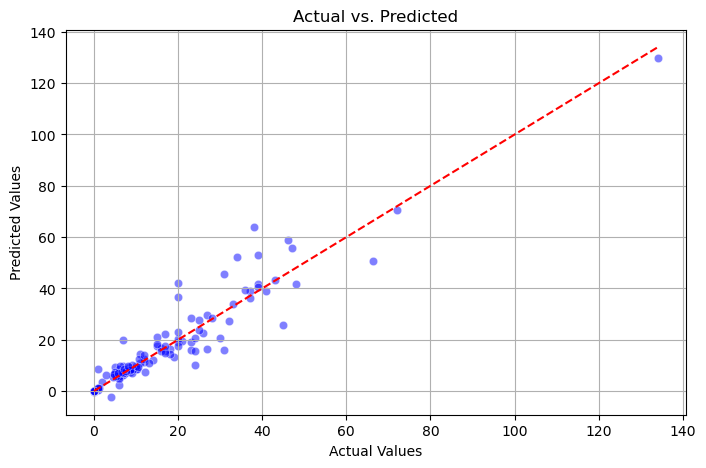

,Actual,Predicted
611,46.200,58.975488
174,12.000,11.194347
67,20.000,42.042086
168,23.000,15.841569
275,134.000,129.654977
336,7.400,7.014679
811,39.000,41.570863
86,2.000,3.633893
541,0.065,0.028906
716,15.000,17.651193


In [14]:
# Part 13
# Presenting the Results

if df[target].dtype in ['float64', 'int64']:  
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")


    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")

    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted")
    plt.grid(True)
    plt.show()

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)






